# College Graduate Admission using ANN

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/data/Admission_Predict.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(400, 9)

In [6]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
df.drop("Serial No.", axis = 1, inplace = True)

In [8]:
# Independent and Dependent features
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [9]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [11]:
!pip install tensorflow==2.5.0

     |████████████████████████████████| 454.3 MB 16 kB/s 
     |████████████████████████████████| 4.0 MB 42.8 MB/s 
     |████████████████████████████████| 462 kB 56.5 MB/s 
     |████████████████████████████████| 1.2 MB 43.2 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68729 sha256=ed3e8fc35feda0467a1d53df0a18962324385a7a301c39d1c787dbac3de954d5
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.42.0
    Uninstalling grpcio-1.42.0:
      Successfully uninstalled grpcio-1.42.0
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.13.3
    Uninstalling wrapt-1.13.3:
      Suc

In [12]:
import tensorflow
tensorflow.__version__

'2.5.0'

In [13]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [14]:
model = Sequential()

In [15]:
model.add(Dense(3, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(1, activation = "linear"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer = "Adam", loss = "mean_squared_error")

In [18]:
model.fit(X_train, y_train, epochs = 10, batch_size = 10, verbose = 1)

Epoch 1/10
36/36 [==============================] - 0s 953us/step - loss: 1.0554
Epoch 2/10
36/36 [==============================] - 0s 976us/step - loss: 0.7986
Epoch 3/10
36/36 [==============================] - 0s 1ms/step - loss: 0.6396
Epoch 4/10
36/36 [==============================] - 0s 988us/step - loss: 0.5348
Epoch 5/10
36/36 [==============================] - 0s 1ms/step - loss: 0.4587
Epoch 6/10
36/36 [==============================] - 0s 907us/step - loss: 0.3952
Epoch 7/10
36/36 [==============================] - 0s 1ms/step - loss: 0.3448
Epoch 8/10
36/36 [==============================] - 0s 999us/step - loss: 0.3029
Epoch 9/10
36/36 [==============================] - 0s 995us/step - loss: 0.2672
Epoch 10/10
36/36 [==============================] - 0s 1ms/step - loss: 0.2362


In [19]:
# Lets predict on the test data
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

-2.0133986117557194

In [21]:
model.add(Dense(3, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(1, activation = "linear"))

# Model compile
model.compile(optimizer = "Adam", loss = "mean_squared_error")

# Model Training
model.fit(X_train, y_train, epochs = 100, batch_size = 10, verbose = 1)

Epoch 1/100
36/36 [==============================] - 0s 1ms/step - loss: 0.4882
Epoch 2/100
36/36 [==============================] - 0s 1ms/step - loss: 0.4139
Epoch 3/100
36/36 [==============================] - 0s 1ms/step - loss: 0.3382
Epoch 4/100
36/36 [==============================] - 0s 1ms/step - loss: 0.2616
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 0.1831
Epoch 6/100
36/36 [==============================] - 0s 977us/step - loss: 0.1262
Epoch 7/100
36/36 [==============================] - 0s 948us/step - loss: 0.0966
Epoch 8/100
36/36 [==============================] - 0s 955us/step - loss: 0.0767
Epoch 9/100
36/36 [==============================] - 0s 912us/step - loss: 0.0613
Epoch 10/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0474
Epoch 11/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0354
Epoch 12/100
36/36 [==============================] - 0s 961us/step - loss: 0.0293
Epoch 13/100
36/36 [=======

In [22]:
# Lets predict on the test data
y_pred = model.predict(X_test)

In [23]:
# R2 score
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.5936250202321888

In [24]:
model.add(Dense(7, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(7, activation = "relu"))
model.add(Dense(1, activation = "linear"))

# Model compile
model.compile(optimizer = "Adam", loss = "mean_squared_error")

# Model Training
model.fit(X_train, y_train, epochs = 100, batch_size = 10, verbose = 1)

Epoch 1/100
36/36 [==============================] - 0s 1ms/step - loss: 0.6261
Epoch 2/100
36/36 [==============================] - 0s 1ms/step - loss: 0.3465
Epoch 3/100
36/36 [==============================] - 0s 1ms/step - loss: 0.1826
Epoch 4/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0667
Epoch 5/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0138
Epoch 6/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 8/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 9/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 10/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 11/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 12/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 13/100
36/36 [=================

In [25]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.6477831445099369

In [27]:
model.add(Dense(7, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(7, activation = "relu"))
model.add(Dense(1, activation = "linear"))

# Model compile
model.compile(optimizer = "Adam", loss = "mean_squared_error")

# Model Training
history = model.fit(X_train, y_train, epochs = 100, batch_size = 10, verbose = 1, validation_split = 0.2)

Epoch 1/100
29/29 [==============================] - 1s 8ms/step - loss: 0.5341 - val_loss: 0.4312
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 0.3474 - val_loss: 0.2629
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 0.1591 - val_loss: 0.0513
Epoch 4/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0147 - val_loss: 0.0078
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0041
Epoch 7/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0040
Epoch 8/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0041
Epoch 9/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0039
Epoch 10/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.0039
Epoch 11/

In [28]:
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.6247256420780007

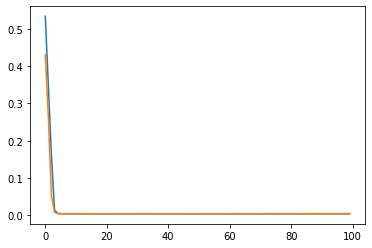

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])